Set the learning rate of each parameter group using a cosine annealing schedule, where $ \eta_{max} $is set to the initial lr and $ T_{cur} $ is the number of epochs since the last restart in SGDR:

\begin{aligned}
\eta_{t} &=\eta_{\min }+\frac{1}{2}\left(\eta_{\max }-\eta_{\min }\right)\left(1+\cos \left(\frac{T_{\text {cur }}}{T_{\max }} \pi\right)\right), T_{\text {cur }} \neq(2 k+1) T_{\operatorname{max}} \\
\eta_{t+1} &=\eta_{t}+\frac{1}{2}\left(\eta_{\max }-\eta_{\min }\right)\left(1-\cos \left(\frac{1}{T_{\max }} \pi\right)\right),   T_{\text {cur }} =(2 k+1) T_{\operatorname{max}}
\end{aligned}

In [7]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(1)

LR = 1  # 学习率
iteration = 10
max_epoch = 200

weights = torch.tensor(1, requires_grad=True, dtype=torch.float32)
target = torch.zeros(1)

optimizer = optim.SGD([weights], lr=LR, momentum=0.9)
# Decays the learning rate of each parameter group by gamma every step_size epochs.
scheduler_lr = optim.lr_scheduler.CosineAnnealingLR(optimizer=optimizer,
                                                    T_max=50,  # 即T_{\max }
                                                    eta_min=0.3)  # 最小学习率,即\eta_{\min

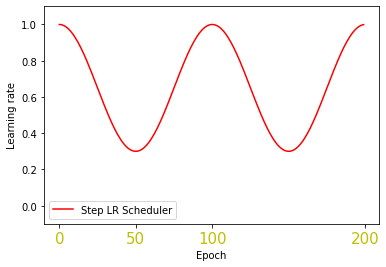

In [8]:
lr_list, epoch_list = list(), list()
for epoch in range(max_epoch):
    lr_list.append(optimizer.param_groups[0]['lr'])
    epoch_list.append(epoch)
    for i in range(iteration):
        loss = torch.pow((weights - target), 2)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()  # step级进行一次学习调整

    scheduler_lr.step()  # epoch级进行一次学习率调整

plt.plot(epoch_list, lr_list, label="Step LR Scheduler", color='red')
plt.xticks([0, 50, 100, 200], color='y', size=15)
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.ylim([-0.1, 1.1])
plt.legend()
plt.show()